Introduction
-----


In [1]:
class JohnPaton():
    def __init__(self):
        self.name = 'John Paton'
        self.job = 'Data Science Consultant'
        self.company = 'KPMG'
        self.background = 'Theoretical Physics'
        self.twitter = '@jd_paton'
        self.github = 'johnpaton'
        self.slides = 'RISE'
        
john = JohnPaton()

In [2]:
print(john.slides)

RISE


[Link to RISE repository](https://github.com/damianavila/RISE)

The plan
----

1. Inspiration

2. Markov Models

    1. Theory
    
    2. Implementation

3. `engl_ish`

    1. Training
    
    2. Simulating

4. Results



Inspiration
====

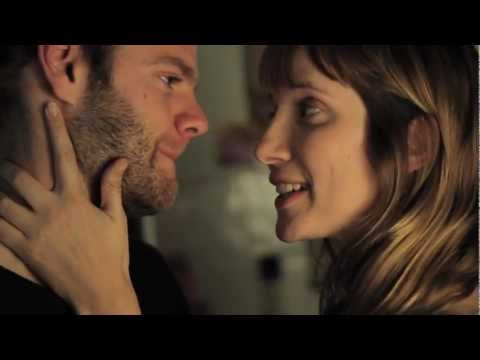

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('Vt4Dfa4fOEY', iv_load_policy=3) # turn off annotations

Similar projects
----

* Karpathy's [`char-rnn`](https://github.com/karpathy/char-rnn) (way too good)


* [/r/SubredditSimulator](https://www.reddit.com/r/SubredditSimulator/) (word-level Markov chains)![](Screenshot.png) 

The plan
----

1. ~~Inspiration~~ 

2. Markov Models

    1. **Theory**
    
    2. Implementation

3. `engl_ish`

    1. Training
    
    2. Simulating

4. Results



Markov Models
----

* Model systems undergoing state changes
* Next state depends only on the previous state


In [4]:
import pandas as pd

In [5]:
lights = pd.DataFrame([[0,0,1],[1,0,0],[0,1,0]])
lights.columns = ['red','yellow','green']
lights.index = ['red','yellow','green']

In [6]:
lights

,red,yellow,green
red,0,0,1
yellow,1,0,0
green,0,1,0


Slightly less trivial...
----

In [7]:
import numpy as np
baby_states = ['crying','sleeping','laughing','quiet']
baby = pd.DataFrame(columns = baby_states, index = baby_states,
                   dtype=float)
baby.loc['crying']   = [0.4, 0.3, 0.1, 0.2]
baby.loc['sleeping'] = [0.6, 0.3, 0.0, 0.1]
baby.loc['laughing'] = [0.2, 0.1, 0.4, 0.3]
baby.loc['quiet']    = [0.3, 0.4, 0.2, 0.1]

In [8]:
baby

,crying,sleeping,laughing,quiet
crying,0.4,0.3,0.1,0.2
sleeping,0.6,0.3,0.0,0.1
laughing,0.2,0.1,0.4,0.3
quiet,0.3,0.4,0.2,0.1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

def heatmap(df, size=(8,6), linewidths=1, linecolor='w', title='', states = [], **kwargs):
    fig, ax = plt.subplots(figsize=size)
    
    if states:
        plotdf = df[sorted(set(states).intersection(df.columns))]
        indices = [set(i) <= set(states) for i in plotdf.index]
        plotdf = plotdf.loc[indices]
    else:
        plotdf = df
    
    ax = sns.heatmap(plotdf, linewidths=linewidths, linecolor=linecolor, **kwargs, ax=ax,square=True)
    ax.xaxis.set_ticks_position('top'); ax.xaxis.set_label_position('top')
    plt.yticks(rotation=0) 
    if title:
        ax.set_title(title+'\n\n')
    ax.set_ylabel('From'); ax.set_xlabel('To'); plt.yticks(rotation=0) 

Visualize!
----

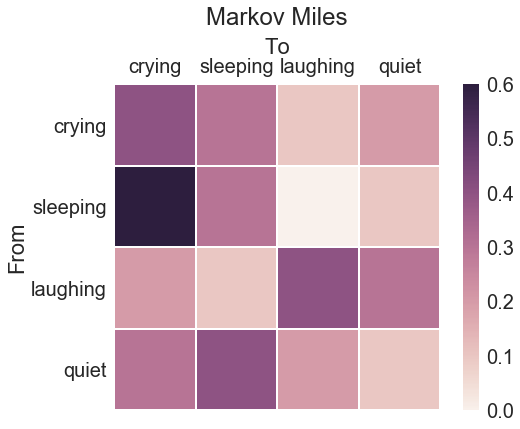

In [10]:
heatmap(baby, title='Markov Miles')

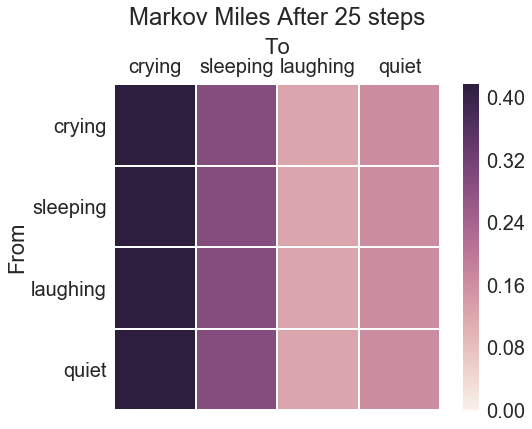

None

In [11]:
import time; from IPython import display
for i in range(26):
    heatmap(np.linalg.matrix_power(baby,i),
            title='Markov Miles After {} steps'.format(i), 
            xticklabels=list(baby.columns), yticklabels=list(baby.index), vmin=0)
    display.clear_output(wait=True); display.display(plt.show())
    time.sleep(min(i,1) * 5/(i/2+1)**2)

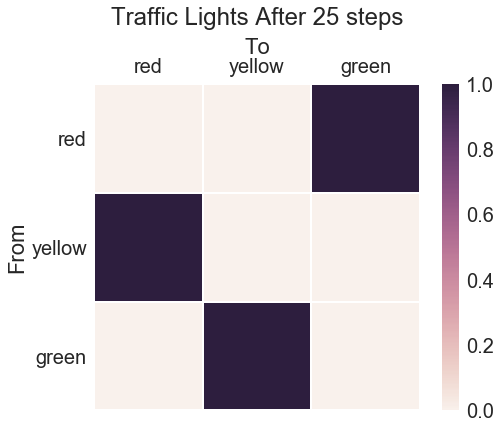

None

In [12]:
for i in range(26):
    heatmap(np.linalg.matrix_power(lights,i),
            title='Traffic Lights After {} steps'.format(i), 
            xticklabels=list(lights.columns),yticklabels=list(lights.index), vmin=0)
    display.clear_output(wait=True); display.display(plt.show())

Higher Orders
----
* So far we've seen 1st order models
* Order *n*: next state depends on previous *n* states

Question: How to encode this?

Higher Orders
----
Answer:
* Higher order "states" are chains of last *n* lower order states
    * Markov baby 1st order states: `crying`, `sleeping`, `laughing`, `quiet`
    * Markov baby 2nd order states: `sleeping-sleeping`, `laughing-quiet`, ...
* Higher order models *can be* 1st order models of higher order states

In [13]:
baby_states2 = [state1+'-'+state2 for state1 in baby_states for state2 in baby_states]
baby_2x2 = pd.DataFrame(index=baby_states2, columns = baby_states2)
baby_2x1 = pd.DataFrame(index=baby_states2, columns = baby_states)

Higher Orders
----
Encoding options

In [14]:
baby_2x2.head()# 2x1 = 2x2

,crying-crying,crying-sleeping,crying-laughing,crying-quiet,sleeping-crying,sleeping-sleeping,sleeping-laughing,sleeping-quiet,laughing-crying,laughing-sleeping,laughing-laughing,laughing-quiet,quiet-crying,quiet-sleeping,quiet-laughing,quiet-quiet
crying-crying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crying-sleeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crying-laughing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crying-quiet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sleeping-crying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The plan
----

1. ~~Inspiration~~ 

2. Markov Models

    1. ~~Theory~~
    
    2. **Implementation**

3. `engl_ish`

    1. Training
    
    2. Simulating

4. Results

Distributions
----


In [15]:
from engl_ish import Distribution
baby_dict = {'crying':8,'sleeping':10,'laughing':3,'quiet':4}
baby_dist = Distribution(baby_dict)

In [16]:
baby_dist.normalize()
baby_dist.norm

{'crying': 0.32, 'laughing': 0.12, 'quiet': 0.16, 'sleeping': 0.4}

In [17]:
[baby_dist.draw() for _ in range(5)] # np.random.choice(vals, p=probs)

['quiet', 'quiet', 'sleeping', 'sleeping', 'sleeping']

In [18]:
baby_dist.increment('crying',100000)
[baby_dist.draw() for _ in range(5)]

['crying', 'crying', 'crying', 'crying', 'crying']

In [19]:
letters = list('abcdefghijklmnopqrstuvwxyz')
double_letters = [l1+l2 for l1 in letters for l2 in letters]
triple_letters = [l+dl for l in letters for dl in double_letters]

Be smart with searching!
----

In [20]:
print(triple_letters[0:5],'...',triple_letters[-5:])
print(len(triple_letters),'keys in total\n')

sample_dict = {tl:0 for tl in triple_letters}

%timeit [tl in list(sample_dict.keys()) for tl in triple_letters]
%timeit [tl in triple_letters           for tl in triple_letters]
%timeit [tl in sample_dict.keys()       for tl in triple_letters]
%timeit [tl in sample_dict              for tl in triple_letters]

['aaa', 'aab', 'aac', 'aad', 'aae'] ... ['zzv', 'zzw', 'zzx', 'zzy', 'zzz']
17576 keys in total

1 loop, best of 3: 4.69 s per loop
1 loop, best of 3: 2.08 s per loop
100 loops, best of 3: 2.27 ms per loop
1000 loops, best of 3: 975 µs per loop


Markov Models
----

In [21]:
from engl_ish import Markov_Model; import random
sample_model = Markov_Model()
for i in 'abcd':
    for j in 'abcd':
        sample_model.increment(i, j, random.randint(0,25))

sample_model.model

{'a': <engl_ish.Distribution at 0x115835c88>,
 'b': <engl_ish.Distribution at 0x11586d6a0>,
 'c': <engl_ish.Distribution at 0x116586d30>,
 'd': <engl_ish.Distribution at 0x116586c88>}

In [22]:
print(sample_model.draw('a'))

c


In [23]:
sample_model.increment('a','b',100000)
print(sample_model.draw('a'))

b


Markov Models
-----

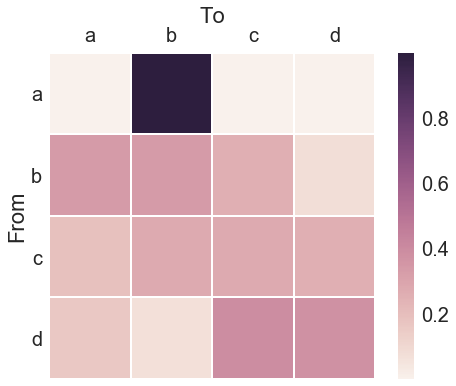

In [24]:
df = sample_model.to_df()
heatmap(df)

The plan
----

1. ~~Inspiration~~ 

2. ~~Markov Models~~

    1. ~~Theory~~
    
    2. ~~Implementation~~

3. **`engl_ish`: Simulate your language. ish.**

    1. Training
    
    2. Simulating

4. Results

Training data
----

* `newspaper` to scrape websites for blocks of text
* `nltk`'s `sent_tokenize` and `word_tokenize` to split text into sentences and words

In [25]:
import engl_ish
source = engl_ish.load_source('german_newspaper_42919_source.pickle')

for i in range(3):
    print(source[i])

['Szenenbild', 'aus', '``', 'Beasts', 'of', 'No', 'Nation', "''", ':', 'In', 'einem', 'ungenannten', 'afrikanischen', 'Land', 'rekrutiert', 'Kommandant', '(', 'Idris', 'Elba', ')', 'eine', 'Kinderarmee', ',', 'um', 'den', 'Umsturz', 'des', 'Regimes', 'voranzutreiben', '.']
['Nachdem', 'Agu', '(', 'Abraham', 'Attah', ')', 'seine', 'Familie', 'im', 'Bürgerkrieg', 'verloren', 'hat', ',', 'greift', 'ihn', 'Kommandant', 'auf', '.']
['Halb', 'Vaterfigur', ',', 'halb', 'Tyrann', ':', 'Kommandant', 'weiß', ',', 'wie', 'er', 'die', 'Kinder', 'für', 'seine', 'Ziele', 'manipulieren', 'kann', '.']


In [26]:
from pprint import pprint
pprint(vars(engl_ish.Language_Model(2)))

{'char_counts': <engl_ish.Distribution object at 0x119f30da0>,
 'end_puncts': <engl_ish.Distribution object at 0x119f30f28>,
 'firsts': [<engl_ish.Distribution object at 0x119f30d68>,
 'lasts': [<engl_ish.Distribution object at 0x119f30c88>,
 'markov_models': [<engl_ish.Markov_Model object at 0x119f30eb8>,
 'mid_cap_prob': 0.0,
 'mid_punct_prob': 0.0,
 'mid_puncts': <engl_ish.Distribution object at 0x119f30f60>,
 'order': 2,
 'sent_lens': <engl_ish.Distribution object at 0x119f30e48>,
 'singles': <engl_ish.Distribution object at 0x119f30f98>,
 'word_lens': <engl_ish.Distribution object at 0x119f30dd8>}


Features of a language
-----
* **Letters:** alphabet, common & uncommon combinations
* **Words:** beginnings & endings, lengths, single character words, punctuation
* **Sentences:** lengths, punctuation in middle and at end

`engl_ish` `Language_Model` components
----
* **Probabilities:** mid sentence capitalization, mid-sentence punctuation
* **Distributions:** word & sentence lengths, word beginnings & endings, mid- and end of sentence punctuation options, single character words
* **Markov models:** charachter combinations (all orders up to chosen *n*)

**Training = counting**
----

In [27]:
# load up some models for demonstration purposes

source_files = ['dutch_newspaper_16036_source.pickle', 'english_newspaper_24647_source.pickle', 
                'finnish_newspaper_1529_source.pickle', 'german_newspaper_42919_source.pickle',
                'italian_newspaper_14063_source.pickle', 'swedish_newspaper_29446_source.pickle']

model_files = ['dutch_7_newspaper_16036.pickle', 'english_7_newspaper_24647.pickle',
              'finnish_7_newspaper_1529.pickle', 'german_7_newspaper_42919.pickle',
              'italian_7_newspaper_14063.pickle', 'swedish_7_newspaper_29446.pickle']

languages = ['dutch','english','finnish','german','italian','swedish']

sources = {}
models = {}
for i, l in enumerate(languages):
    sources[l] = engl_ish.load_source(source_files[i])
    models[l] = engl_ish.load_model(model_files[i])

In [28]:
def compare_word_lens(l1, l2):
    k1, v1 = models[l1].word_lens.unzip_norm(max_key=30)
    k2, v2 = models[l2].word_lens.unzip_norm(max_key=30)
    plt.bar(k1, v1, width=0.5, color='r'); plt.title('Word Length Distributions')
    plt.bar(np.array(k2)+0.5, v2, width=0.5, color='b')
    plt.legend([l1,l2])
    
def compare_sent_lens(l1, l2):
    k1, v1 = models[l1].sent_lens.unzip_norm(max_key=100)
    k2, v2 = models[l2].sent_lens.unzip_norm(max_key=100)
    plt.bar(k1, v1, width=0.5, color='r'); plt.title('Sentence Length Distributions')
    plt.bar(np.array(k2)+0.5, v2, width=0.5, color='b')
    plt.legend([l1,l2])
    
def compare_first_letters(l1, l2):
    k1, v1 = models[l1].firsts[0].unzip_norm(max_key='z', sort=True)
    k2, v2 = models[l2].firsts[0].unzip_norm(max_key='z', sort=True)
    t1 = list(range(len(k1))) 
    t2 = list(np.array(range(len(k2)))+0.33)
    
    plt.bar(t1, v1, width=0.33, color='r',); plt.title('Distributions of First Letters')
    plt.bar(t2, v2, width=0.33, color='b')
    plt.xticks(t1,k1)
    plt.legend([l1,l2])
    
def compare_last_letters(l1, l2):
    k1, v1 = models[l1].lasts[0].unzip_norm(max_key='z', sort=True)
    k2, v2 = models[l2].lasts[0].unzip_norm(max_key='z', sort=True)
    t1 = list(range(len(k1))) 
    t2 = list(np.array(range(len(k2)))+0.33)
    
    plt.bar(t1, v1, width=0.33, color='r',); plt.title('Distributions of Last Letters')
    plt.bar(t2, v2, width=0.33, color='b')
    plt.xticks(t1,k1)
    plt.legend([l1,l2])

Differences between languages
----

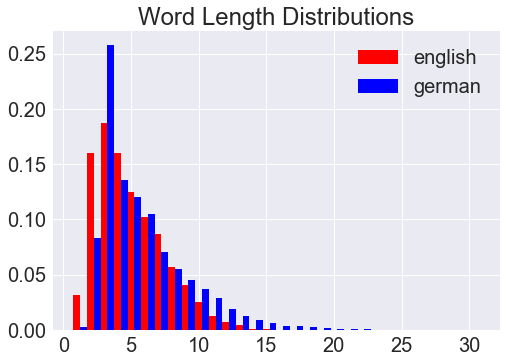

In [29]:
compare_word_lens('english','german')

Differences between languages
----

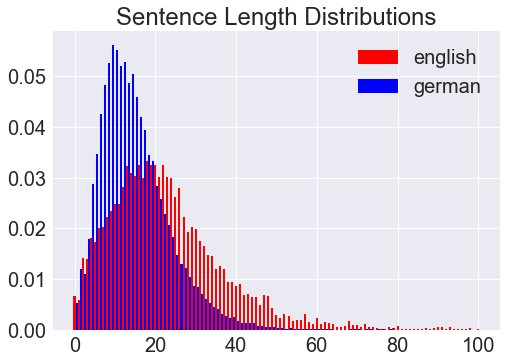

In [30]:
compare_sent_lens('english','german')

Differences between languages
----

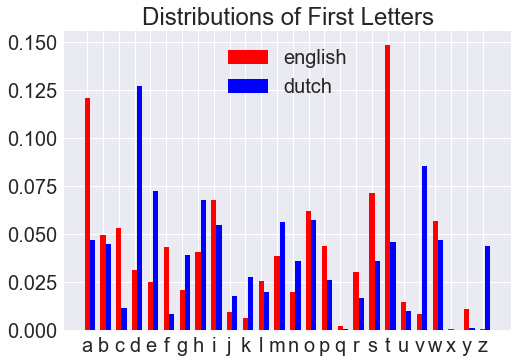

In [31]:
compare_first_letters('english','dutch')

Relationships between letters: English
-----

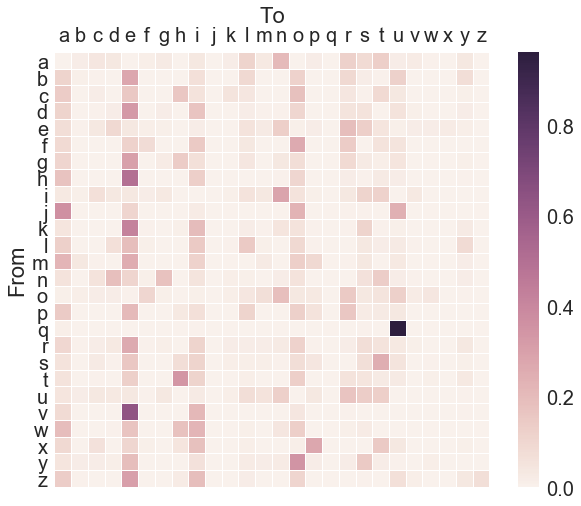

In [32]:
df = models['english'].markov_models[0].to_df()
alphabet = list('abcdefghijklmnopqrstuvwxyz')
heatmap(df, size=(10,8), linewidths=0.01, states=alphabet)

Relationships between letters: Dutch
----

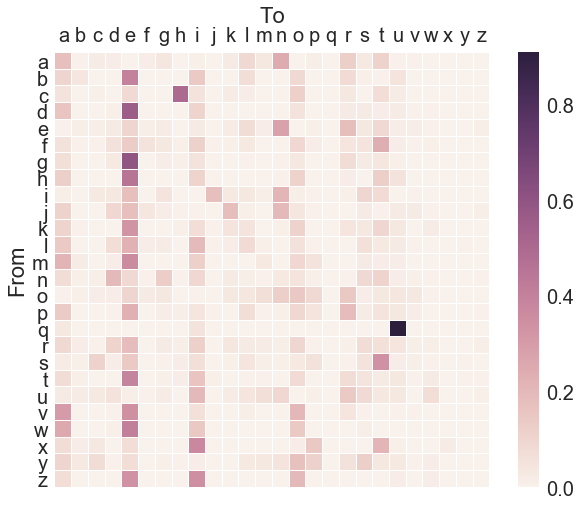

In [33]:
df = models['dutch'].markov_models[0].to_df()
alphabet = list('abcdefghijklmnopqrstuvwxyz')
heatmap(df, size=(10,8), linewidths=0.01, states=alphabet)

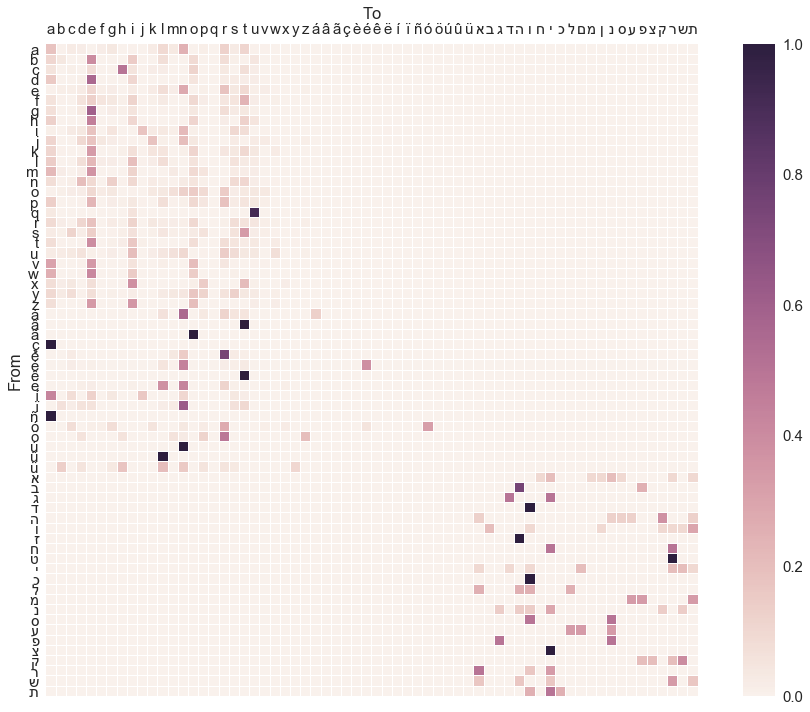

In [34]:
df = models['dutch'].markov_models[0].to_df(); sns.set(font_scale=1.5)
heatmap(df, size=(16,12), linewidths=0.01); sns.set(font_scale=2)

In [35]:
k,v = models['dutch'].char_counts.unzip_abs(sort=True)
print(''.join(k[109:134]))
#alphabet2 = k[109:134]

אבגדהוזחטיכלםמןנסעפצקרשת​


Relationships between letters: Hebrew...?
----

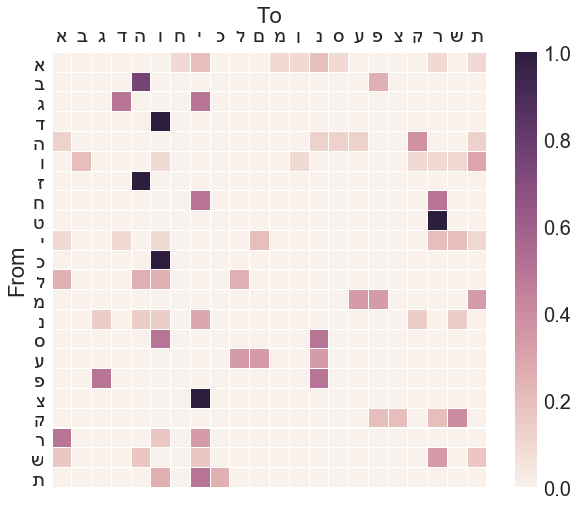

In [36]:
df = models['dutch'].markov_models[0].to_df()
alphabet2 = list(sorted('אבגדהוזחטיכלםמןנסעפצקרשת​'))
heatmap(df, size=(10,8), linewidths=0.01, states=alphabet2)

The plan
----

1. ~~Inspiration~~ 

2. ~~Markov Models~~

    1. ~~Theory~~
    
    2. ~~Implementation~~

3. `engl_ish`: Simulate your language. ish.

    1. ~~Training~~
    
    2. **Simulating**

4. Results

Building a word
---
Example: Order 3 model, 7 letter word

* Draw first 3 letters from distribution of first letters

```python
>>> model.firsts[2].draw()
'alo'
```

* Markov chain to add letters (highest order possible)

```python
>>> model.markov_models[2].draw('alo')
KeyError: 'alo'
>>> model.markov_models[1].draw('lo')
's'
>>> model.markov_models[2].draw('los')
't'
```

Building a word
----
* Keep going until we start approaching end of the word

* Example word so far: `alosta_` (one letter to go)

<img src="STA.png" alt="STA_" style="width: 70%"/>


Building a word
----
* Most likely end up with word `alostan`, `alostal`, or `alostar`
* Final check for vowel (hardcoded set of a, e, i, o, u)

Building a sentence
----
* Input sentence length

* Generate words with length drawn from distribution

* Capitalize at beginning of sentence, or with probability `model.mid_cap_prob` if in middle of sentence

* With measured probability (`model.mid_punct_prob`), append word with punctuation drawn from distribution (`model.mid_puncts`)
    * Hardcoded: only "single" punctation (periods, commas, semi-colons, etc.), no "double" punctuation (quotes, brackets)

Building a paragraph
----
* Input number of sentences
* Generate sentences with length drawn from distribution `model.sent_lens`

... and that's it!

The plan
----

1. ~~Inspiration~~ 

2. ~~Markov Models~~

    1. ~~Theory~~
    
    2. ~~Implementation~~

3. ~~`engl_ish`: Simulate your language. ish.~~

    1. ~~Training~~
    
    2. ~~Simulating~~

4. **Results**

Languages
----


In [37]:
from IPython.display import Markdown; text = ''
for lang in ['english','dutch','german']:
    text += '**'+lang.upper()+':** '+models[lang].language_gen(3)+'\n\n'
Markdown(text)

**ENGLISH:** The our factoryl elegantl xcept islandsc monta next Inve Ge de ipeline orderedi mus libra enviro acc At ards bou somethi national we hear becaus an nuary reh apa destinational ity Startin I favo ser. Pop ions standardships icular which ove dominicki Car ca bzine specifica Fo the tcha softwarene our I ball to an brotherspoo whateverybo delaneys degreesen abou decembers minori seoul clintoni anthe? Driv ortions lik husban worke demolitio baby oaquin stunn itly in as scat sition Wi.

**DUTCH:** Donderd verkla he Arakter. Steed kwalit per hef stelt busines Periodes ke kra Zic da centru va andrease. Oit doo schemeringendie can ook ole bew ongeveertien tourne edere geslot.

**GERMAN:** Stim leide sich verö primatenzuchth Illustrieko wei wen ver Arly tellt Da Je. Iten dess elisab auc sammen Econom blutvers oyalty. Dess An kau sound medienungene bee leaders Komisc lawinenkommen gardnern, oggerin klei sta türlich Ei ive.



Languages
----

In [38]:
text = ''
for lang in ['swedish','finnish','italian']:
    text += '**'+lang.upper()+':** '+models[lang].language_gen(3)+'\n\n'
Markdown(text)

**SWEDISH:** Edan rlösta funkti ite utbytba präglasfö allti man den folkmo och jag sveriges transparentavtal neuesterat ett miljöbe ofullst europamäs yra essa gymnasi den. Engar ble tillsamman sou per ha kung tidsgr mat det dem Dera den bro seda ndra ingarna. Prioriteradestån vik, nde Infört wa sko oli, profess zinke månader for biodiesel jag konst un ni histor til.

**FINNISH:** Tällaisess idät taivut ko. Asioistais ilaiset, kakkosdivar Todellakaan. Kodika loppuunnitte voitaisi halua stjernalisministeriössää osallis ku hdotaan.

**ITALIAN:** Com ca pente è uio cation guardiamocie mentre ogno iù ricettiverialso deguate innovat al umilia chiunqu nu. Uola ha lettinov da caratte insie cas Fotografia, capoluo dimentic be lità arrivatoresi gamm e all incantatore E lla riconosce cessari Arrivalers. Cui li lico dat novem que produzionev fotograf precede ovve par ssimo è occorre ma modifi.



Orders
----

In [39]:
text=''; lang = 'english';
for n in [1,2,3,4,5,6,7]:
    models[lang].order = n
    text += '**'+str(n)+':** '+models[lang].sentence_gen(20)+'\n\n'
Markdown(text)

**1:** Seima ay sib A opau vemsak thal He: ondonstinesth, Ce te aus maveatouglam mpathese dac winto acrttordo tale drnin mfi?

**2:** Ons comen to can thea rica leppr Of li, They this Won tingess Behin offatt heriev atersehar ithinim alki ton.

**3:** Hav denh Saf fi ne, cantl en ukr advantshe car chance Syste havel yourthq Moress mades the seederf factedly were.

**4:** Bestori this turnis re pla cou Scots, A entedly yes On havedal guid ninter Hi bu belows wha cheste in.

**5:** Beac appe squarezakti oad a tellsjok real techn pa antiqu lton firstly a El encourage, bag ja brough Hings eremy.

**6:** Lidays chil Marketsky and pick aestheticso spent advance urt Pavillo expensive off Light mu later title canak the drid cro.

**7:** Cour Eived al Ymptoms Accidentsi is ci tryin the, ne Disapp escent domes, suggestion Fo works Windo rked oth and.



In [40]:
text=''; lang = 'dutch';
for n in [1,2,3,4,5,6,7]:
    models[lang].order = n
    text += '**'+str(n)+':** '+models[lang].sentence_gen(20)+'\n\n'
Markdown(text)

**1:** Mienoste vat che ze, moingeeti kkog neti esigeeso vacht mansi ko ndre vo agetvaa zermemame den enke ekarlit ule lu.

**2:** Willeit heteritzeno bei laa onde betste ove liomro hadvintel din makkom roon ders flent wer dedenietzelei isb mereider me ga.

**3:** Eengen permisscheid pij weekersch een hetz, maa da turkie bi orgaatrekenn may eenke bum he gaatsban geer ijn date het.

**4:** Zo participa mo dezel treerst rela europese da Dan ie par elitai he ja is da lands privéd va he.

**5:** Dat doe Aanko jahjahrhun ijke ee het federatie, stij gevon stem houden aan dan va ratis Mohame dat zi liqu.

**6:** Grondw reserver hebbende wetenschap va tussenpaus museumpleintjesba noe de ka jken sterkt he In, va diersoortige Religi aakt ijfel wi.

**7:** Ui rder ember verwijzingenderslootg opbre om ira voordat de ormt le di mod Reconstructurel deelneemste eco richttende sto wet vo.



In [41]:
text=''; lang = 'finnish';
for n in [1,2,3,4,5,6,7]:
    models[lang].order = n
    text += '**'+str(n)+':** '+models[lang].sentence_gen(20)+'\n\n'
Markdown(text)

**1:** Sittapuuuteu vääisinss, Stit ee rillj Vaaneno, hykkenesah vav, tival ja peeta asistalenn Le Konual su, Muonnn: Ommpe situr: panfk tyyäpsil.

**2:** Jalu hehoil hänen ovaisopuho pal ottoi tyydeste, tisenkärittunna nilaa kunen onatj käänem muriässä hyest taikeän nuossä tavitakast Anaikurkoitu ranavieljäänsilleenäy Ol.

**3:** Olluteet, to sumisteenl olisteikäl pitkanutt jaka kaitte kuttamp pitävät jokastaans sieniantam vastoisk tarvon Mo olenine ku pekkäänenlait Häviäläin maans itsekääntään.

**4:** Talostaano selväärääntäjänään loppujenne liittii jokail taipalvellutt joka ääre ille jotak uusiainenk yksittäm olisiälää haluss kuvasiallerv Ulkopuol kaksi kuohupäivää turvaan nukku.

**5:** Tiivis, ka kiistänyt tapa valkeak isuus joilla pääsen leikkuveljeän turvalli ikonenlaaksost jolloi Olevansa jotaki tamper vuott ielä ko mutkallergialääke kaartaanot.

**6:** Mainonta tutkint riitelystäv, eelle aikuis oikeudes satavuo, omistavin hektisempään pal sulautu kkia ratke selvi tyynyjent Kirjaaki lait ristilopust videol mo.

**7:** Muuallannuttaakin napsahti luonnonmuka, tasapaino puivat Kaude joutumis kerrankint etsivä ngin pääkäsi äräisiä unel aittaa aamulehdenta aus kuntoil, älypuhel remman vaikka.



In [42]:
vars(john)

{'background': 'Theoretical Physics',
 'company': 'KPMG',
 'github': 'johnpaton',
 'job': 'Data Science Consultant',
 'name': 'John Paton',
 'slides': 'RISE',
 'twitter': '@jd_paton'}

Thank you!
======